<a href="https://colab.research.google.com/github/rodraxphysics/Master_VIU_Data_Science/blob/main/02_Analisis_Correlacion_Importancia_Caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>  <center>
## <center> Universidad Internacional de Valencia (VIU) <center>
## <center> Trabajo Fin de Master (TFM) <center>


---


# <center> **Predicción de la magnitud de la banda prohibida (bandgap) en compuestos inorgánicos mediante técnicas de Machine Learning** <center>


---



**Titulación:** Máster en Big Data y Data Science

**Alumno:** Rodrigo Eduardo Sandoval Brito

**Director:** Jose Carlos González, PhD.



---

## <center> **Analisis de correlaciones e importancia de las caracteristicas** <center>

**Importacion de dataset descargado de API de Materials Project desde archivo csv**

In [ ]:
# Imports generales
import pandas as pd
import io
from google.colab import files
import numpy as np
import time

def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)

    return df


In [ ]:

df = upload_files()
df1=df.copy()

Saving DATA_RAW_29222.csv to DATA_RAW_29222 (3).csv
User uploaded file "DATA_RAW_29222 (3).csv" with length 6256363 bytes


**Exploramos tipos de datos y confirmamos que dataset posee 20 campos y cerca de 30 mil instancias**

In [ ]:
print(df.dtypes)
print(df.shape)

band_gap                       float64
nsites                           int64
nelements                        int64
volume                         float64
density                        float64
density_atomic                 float64
crystal_symmetry                 int64
symmetry_number                  int64
sides_abc                      float64
angles_abc                     float64
uncorrected_energy_per_atom    float64
energy_per_atom                float64
formation_energy_per_atom      float64
energy_above_hull              float64
is_stable                        int64
efermi                         float64
is_magnetic                      int64
total_magnetization            float64
num_magnetic_sites             float64
molecular_weight               float64
dtype: object
(29222, 20)


**Ademas confirmamos que no existen valores nulos en ningun campo**

In [ ]:
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)
print(df.shape)

band_gap                       0
nsites                         0
nelements                      0
volume                         0
density                        0
density_atomic                 0
crystal_symmetry               0
symmetry_number                0
sides_abc                      0
angles_abc                     0
uncorrected_energy_per_atom    0
energy_per_atom                0
formation_energy_per_atom      0
energy_above_hull              0
is_stable                      0
efermi                         0
is_magnetic                    0
total_magnetization            0
num_magnetic_sites             0
molecular_weight               0
dtype: int64
(29222, 20)


**Para visualizar mejor los datos de cada caracteristica generamos graficos de dispersion entre las variables**

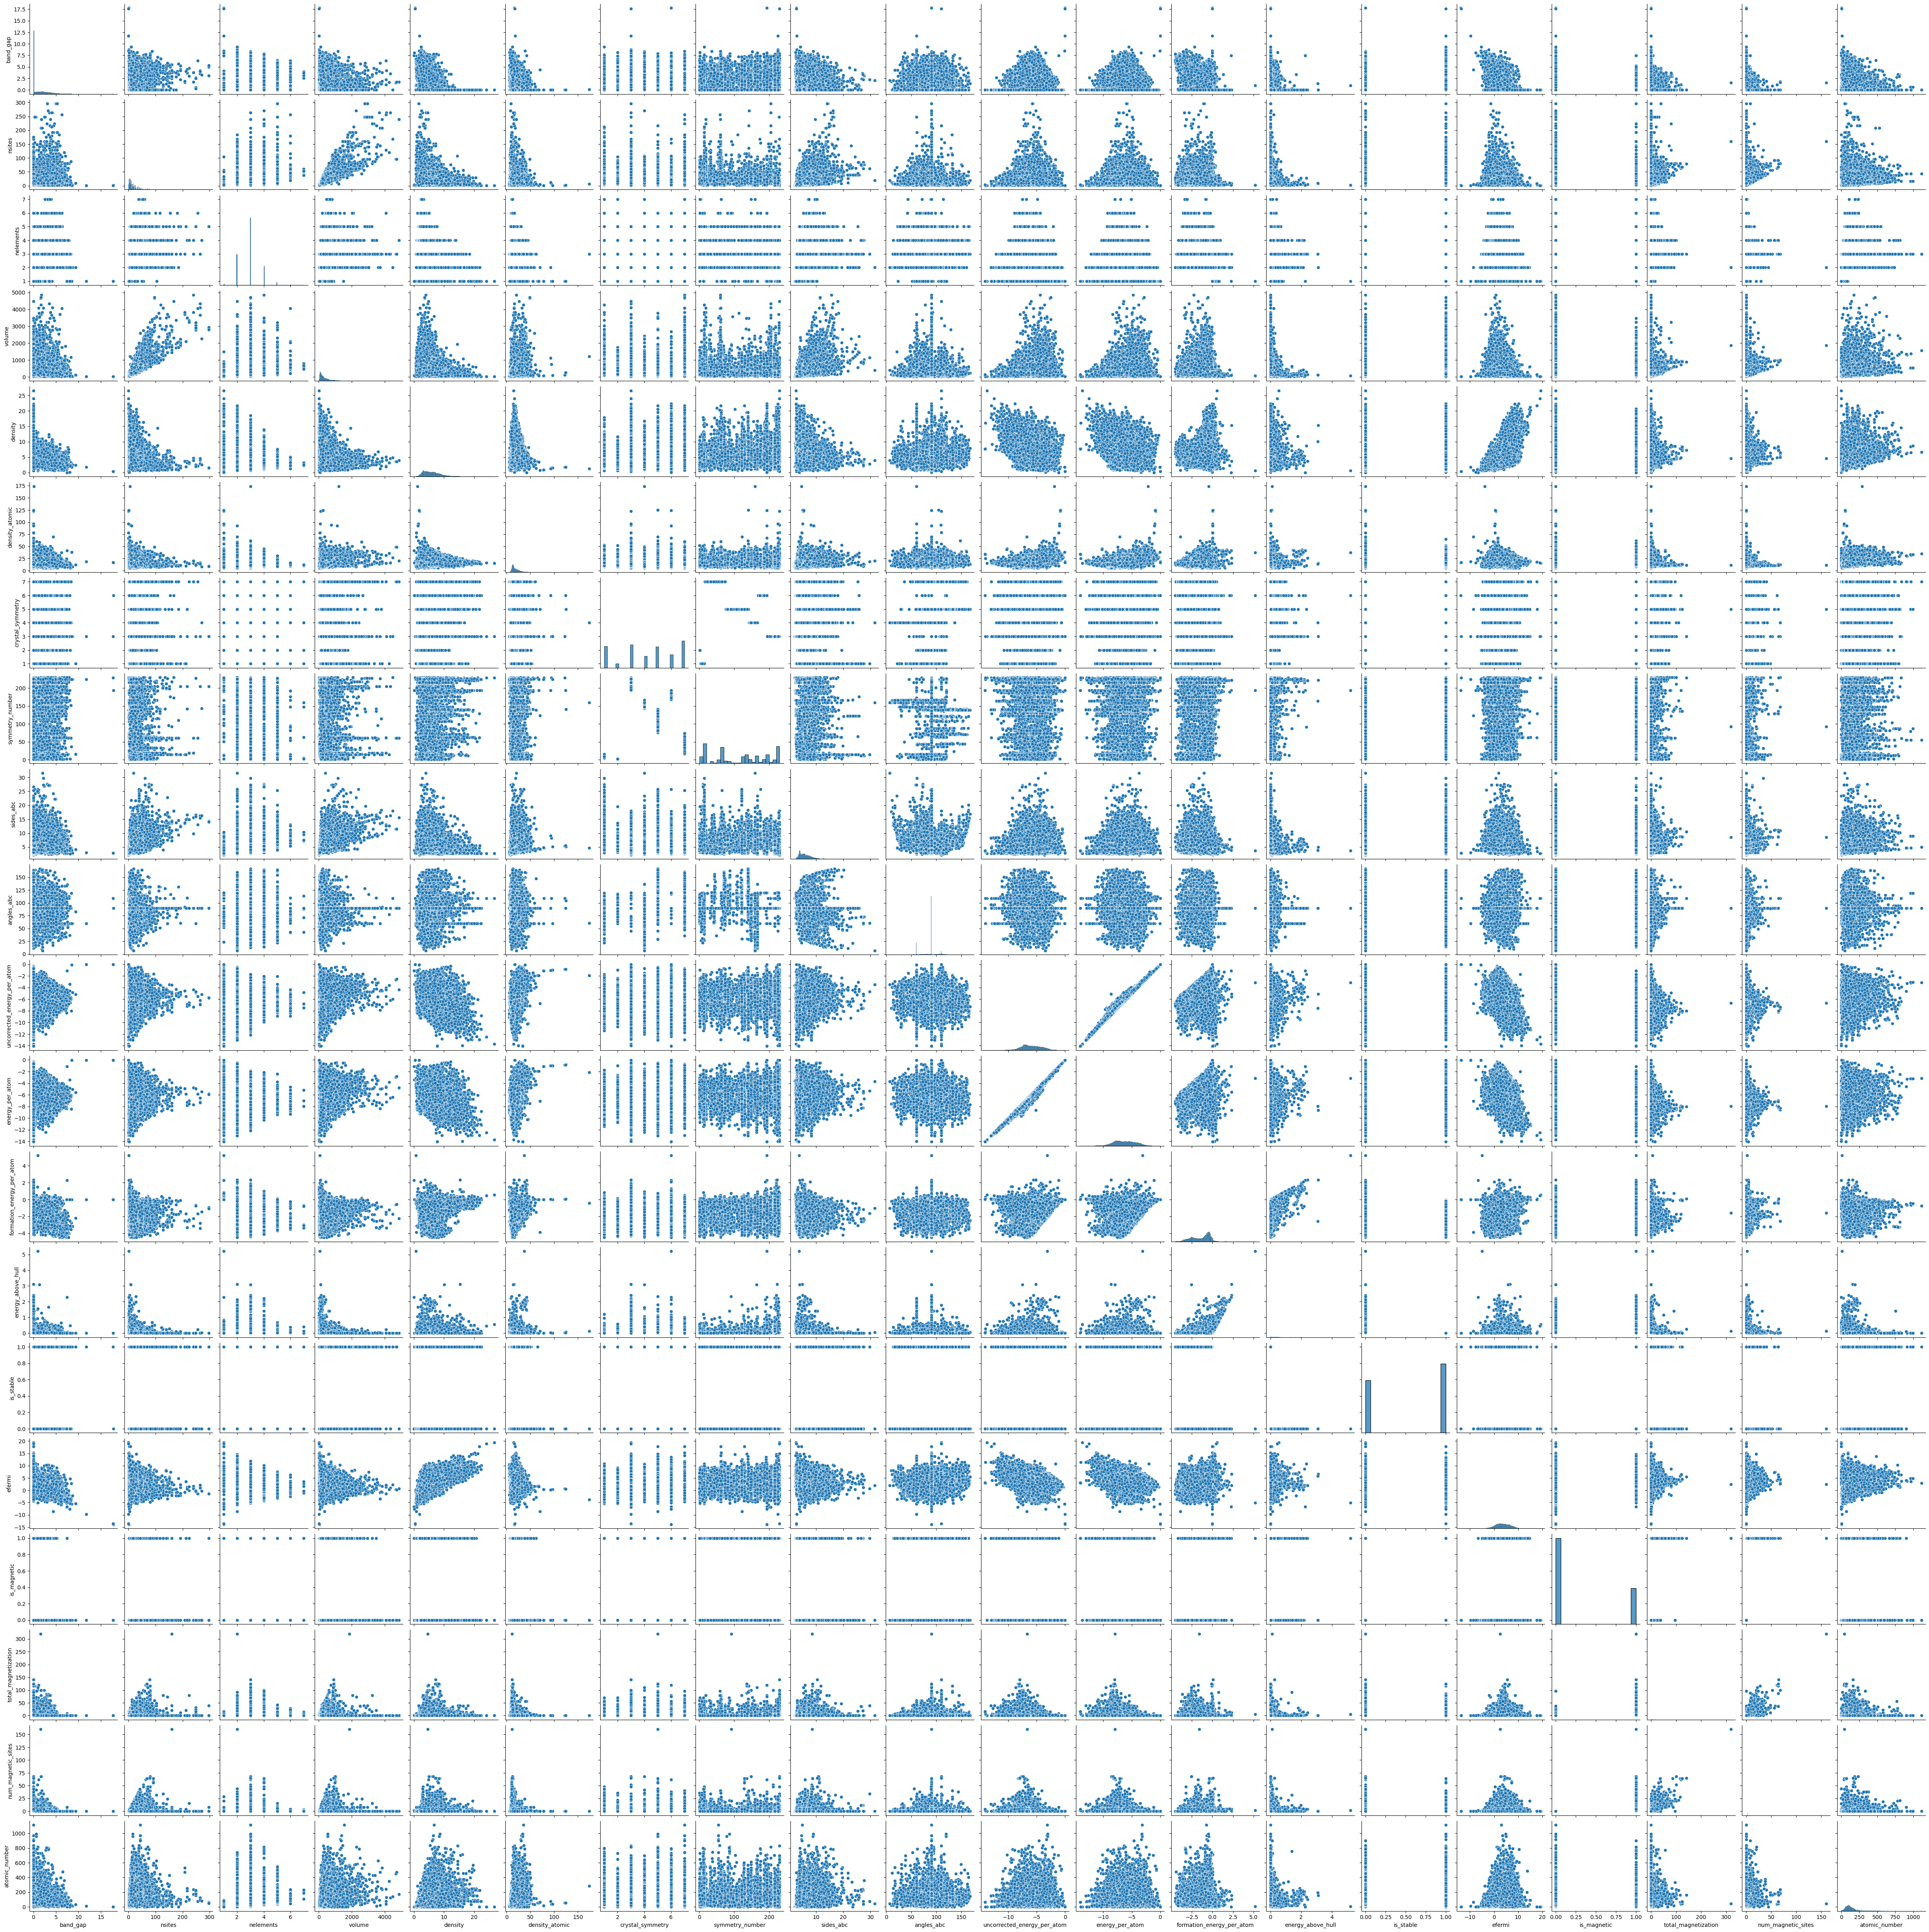

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

se observa relacion lineal entre uncorrected energy y energy per atom. Ademas de leve relacion lineal entre n_sites y volume

**Realizamos un analisis de correlaciones entre las variables independientes con la variable dependiente del bandgap**

In [ ]:
correlaciones = df.corr()
correlaciones_total_cases = correlaciones["band_gap"].drop("band_gap")
correlaciones_total_cases = correlaciones_total_cases.sort_values(ascending=False)
print(correlaciones_total_cases)


nelements                      0.342762
nsites                         0.336312
volume                         0.223184
sides_abc                      0.206136
is_stable                      0.000861
uncorrected_energy_per_atom   -0.036289
angles_abc                    -0.058135
total_magnetization           -0.077079
energy_above_hull             -0.081147
energy_per_atom               -0.086023
crystal_symmetry              -0.125888
num_magnetic_sites            -0.137447
atomic_number                 -0.147894
density_atomic                -0.193157
is_magnetic                   -0.254401
symmetry_number               -0.261715
density                       -0.470034
formation_energy_per_atom     -0.571457
efermi                        -0.635804
Name: band_gap, dtype: float64


**Realizamos un analisis de correlaciones de las variables independientes entre ellas mismas**

In [ ]:
correlaciones = df.corr()
correlaciones_lista = correlaciones.unstack().sort_values(ascending=False).drop_duplicates()
correlaciones_lista = correlaciones_lista[correlaciones_lista != 1]
print(correlaciones_lista)

energy_per_atom      uncorrected_energy_per_atom    0.989614
volume               nsites                         0.855421
total_magnetization  num_magnetic_sites             0.777779
density              efermi                         0.645159
sides_abc            volume                         0.620290
                                                      ...   
density              nelements                     -0.353580
nelements            formation_energy_per_atom     -0.456932
band_gap             density                       -0.470034
                     formation_energy_per_atom     -0.571457
                     efermi                        -0.635804
Length: 190, dtype: float64


**Para visualizar mejor las correlaciones generamos un grafico donde los campos se encuentran escritos utilizando su abreviatura de 3 letras**

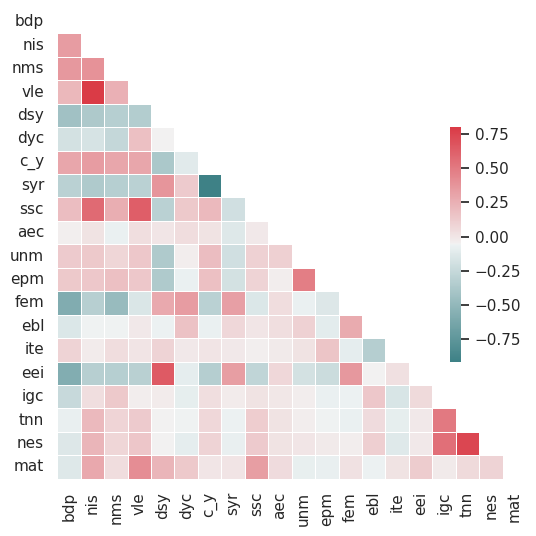

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict

def get_new_name(name, abbreviations_count):
    if len(name) % 2 == 0:
        middle_index = len(name) // 2 - 1
    else:
        middle_index = len(name) // 2
    abbreviation = name[0] + name[middle_index] + name[-1]
    count = abbreviations_count[abbreviation]
    abbreviations_count[abbreviation] += 1
    return abbreviation

df_feat = df.transpose()
abbreviations_count = defaultdict(int)
names = [get_new_name(col, abbreviations_count) for col in df_feat.index]

R = np.corrcoef(df_feat)
mask = np.triu(np.ones_like(R, dtype=bool))

plt.figure(figsize=(8, 6))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8, square=True,
            xticklabels=names, yticklabels=names, linewidths=.5,
            cbar_kws={"shrink": .5, "pad": -0.1})

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('correlaciones.svg', format='svg')
plt.show()

**Instalamos biblioteca cairosvg para exportar imagen como grafico de vectores escalable (SVG)**

In [ ]:
pip install cairosvg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
import cairosvg

# Convert SVG to PDF with adjustable DPI
svg_file = 'correlaciones.svg'
pdf_file = 'correlaciones.pdf'
dpi = 300  # Adjust DPI as needed

# Convert SVG to PDF with specified DPI
cairosvg.svg2pdf(url=svg_file, write_to=pdf_file, dpi=dpi)

print(f"Archivo PDF '{pdf_file}' creado con éxito.")

Archivo PDF 'correlaciones.pdf' creado con éxito.


**Finalmente para complementar el analisis de correlaciones, hallaremos la importancia de cada variable independiente por medio de la aplicacion de Random Forest. Para lo cual primero dividimos los datos en training y test (en ratio 80/20) junto a su respectiva normalizacion**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

selected_features = ['nsites', 'nelements', 'volume', 'density', 'density_atomic', 'crystal_symmetry', 'symmetry_number', 'sides_abc', 'angles_abc', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'efermi', 'is_magnetic', 'total_magnetization', 'num_magnetic_sites', 'molecular_weight', 'Ho_count', 'Ho_mass_ratio', 'Ti_count', 'Ti_mass_ratio', 'Lu_count', 'Lu_mass_ratio', 'Hf_count', 'Hf_mass_ratio', 'Cu_count', 'Cu_mass_ratio', 'Ga_count', 'Ga_mass_ratio', 'Ba_count', 'Ba_mass_ratio', 'Te_count', 'Te_mass_ratio', 'Au_count', 'Au_mass_ratio', 'Ce_count', 'Ce_mass_ratio', 'Pa_count', 'Pa_mass_ratio', 'Br_count', 'Br_mass_ratio', 'Gd_count', 'Gd_mass_ratio', 'Nb_count', 'Nb_mass_ratio', 'Dy_count', 'Dy_mass_ratio', 'Os_count', 'Os_mass_ratio', 'Nd_count', 'Nd_mass_ratio', 'Co_count', 'Co_mass_ratio', 'Zn_count', 'Zn_mass_ratio', 'Ni_count', 'Ni_mass_ratio', 'V_count', 'V_mass_ratio', 'Cd_count', 'Cd_mass_ratio', 'Hg_count', 'Hg_mass_ratio', 'La_count', 'La_mass_ratio', 'Cs_count', 'Cs_mass_ratio', 'B_count', 'B_mass_ratio', 'Ag_count', 'Ag_mass_ratio', 'Ru_count', 'Ru_mass_ratio', 'Ar_count', 'Ar_mass_ratio', 'Tb_count', 'Tb_mass_ratio', 'Y_count', 'Y_mass_ratio', 'Sn_count', 'Sn_mass_ratio', 'Fe_count', 'Fe_mass_ratio', 'Yb_count', 'Yb_mass_ratio', 'P_count', 'P_mass_ratio', 'Sb_count', 'Sb_mass_ratio', 'Er_count', 'Er_mass_ratio', 'Ir_count', 'Ir_mass_ratio', 'Th_count', 'Th_mass_ratio', 'Si_count', 'Si_mass_ratio', 'O_count', 'O_mass_ratio', 'F_count', 'F_mass_ratio', 'Na_count', 'Na_mass_ratio', 'Pr_count', 'Pr_mass_ratio', 'N_count', 'N_mass_ratio', 'Mo_count', 'Mo_mass_ratio', 'Se_count', 'Se_mass_ratio', 'Kr_count', 'Kr_mass_ratio', 'Tl_count', 'Tl_mass_ratio', 'Mg_count', 'Mg_mass_ratio', 'Rb_count', 'Rb_mass_ratio', 'Ne_count', 'Ne_mass_ratio', 'Li_count', 'Li_mass_ratio', 'W_count', 'W_mass_ratio', 'Eu_count', 'Eu_mass_ratio', 'Al_count', 'Al_mass_ratio', 'Pm_count', 'Pm_mass_ratio', 'Sr_count', 'Sr_mass_ratio', 'Rh_count', 'Rh_mass_ratio', 'As_count', 'As_mass_ratio', 'Pt_count', 'Pt_mass_ratio', 'Cr_count', 'Cr_mass_ratio', 'Pd_count', 'Pd_mass_ratio', 'Tc_count', 'Tc_mass_ratio', 'I_count', 'I_mass_ratio', 'Sm_count', 'Sm_mass_ratio', 'Re_count', 'Re_mass_ratio', 'Ge_count', 'Ge_mass_ratio', 'Cl_count', 'Cl_mass_ratio', 'S_count', 'S_mass_ratio', 'U_count', 'U_mass_ratio', 'H_count', 'H_mass_ratio', 'Tm_count', 'Tm_mass_ratio', 'In_count', 'In_mass_ratio', 'K_count', 'K_mass_ratio', 'Bi_count', 'Bi_mass_ratio', 'Mn_count', 'Mn_mass_ratio', 'Ca_count', 'Ca_mass_ratio', 'Sc_count', 'Sc_mass_ratio', 'Pu_count', 'Pu_mass_ratio', 'Ac_count', 'Ac_mass_ratio', 'Be_count', 'Be_mass_ratio', 'Xe_count', 'Xe_mass_ratio', 'C_count', 'C_mass_ratio', 'He_count', 'He_mass_ratio', 'Zr_count', 'Zr_mass_ratio', 'Np_count', 'Np_mass_ratio', 'Ta_count', 'Ta_mass_ratio', 'Pb_count', 'Pb_mass_ratio']

X=df[selected_features]
y=df["band_gap"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Posteriormente aplicamos Random Forest con sus hiperparametros ya optimizados con random search para encontrar las caracteristicas mas relevantes**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Mejores parámetros obtenidos de la búsqueda aleatoria
rf_parameters = {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}

# Inicializar el modelo RandomForestRegressor con los mejores parámetros
best_model = RandomForestRegressor(**rf_parameters)

# Ajustar el modelo a los datos de entrenamiento
best_model.fit(X_train, y_train)

# Supongamos que estos son los nombres de las características utilizadas para entrenar el modelo
feature_names = selected_features

# Obtener la importancia de las características del mejor modelo
importances = best_model.feature_importances_

# Crear un DataFrame para mostrar la importancia de cada característica
features_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ordenar el DataFrame por importancia de manera descendente
features_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Mostrar las características más importantes
print(features_importance_df)

                        Feature  Importance
14                       efermi    0.206852
11    formation_energy_per_atom    0.205728
3                       density    0.086198
16          total_magnetization    0.071824
4                density_atomic    0.050954
0                        nsites    0.045355
15                  is_magnetic    0.039316
17           num_magnetic_sites    0.038031
10              energy_per_atom    0.034627
18             molecular_weight    0.033986
9   uncorrected_energy_per_atom    0.033346
12            energy_above_hull    0.029175
1                     nelements    0.028751
2                        volume    0.025939
6               symmetry_number    0.019926
7                     sides_abc    0.019681
5              crystal_symmetry    0.016163
8                    angles_abc    0.010730
13                    is_stable    0.003420


**Aplicamos la abreviacion de los campos de 3 letras para mejor visualizacion**

In [ ]:
from collections import defaultdict

def get_new_name(name, abbreviations_count):
    if len(name) % 2 == 0:  # Si la longitud es par
        middle_index = len(name) // 2 - 1
    else:
        middle_index = len(name) // 2
    abbreviation = name[0] + name[middle_index] + name[-1]

    # Si es la primera vez que aparece, agregamos '0'
    # Si no, agregamos el siguiente número en la secuencia
    count = abbreviations_count[abbreviation]
    abbreviations_count[abbreviation] += 1
    return abbreviation

# Inicializamos un contador por defecto para realizar un seguimiento de las abreviaturas
abbreviations_count = defaultdict(int)

# Cambiando el nombre de las columnas
# Actualizamos la función get_new_name para que acepte el contador de abreviaturas
features_importance_df.Feature = [get_new_name(col, abbreviations_count) for col in features_importance_df.Feature]

**Generamos grafico de barras segun la importancia de caracteristicas**

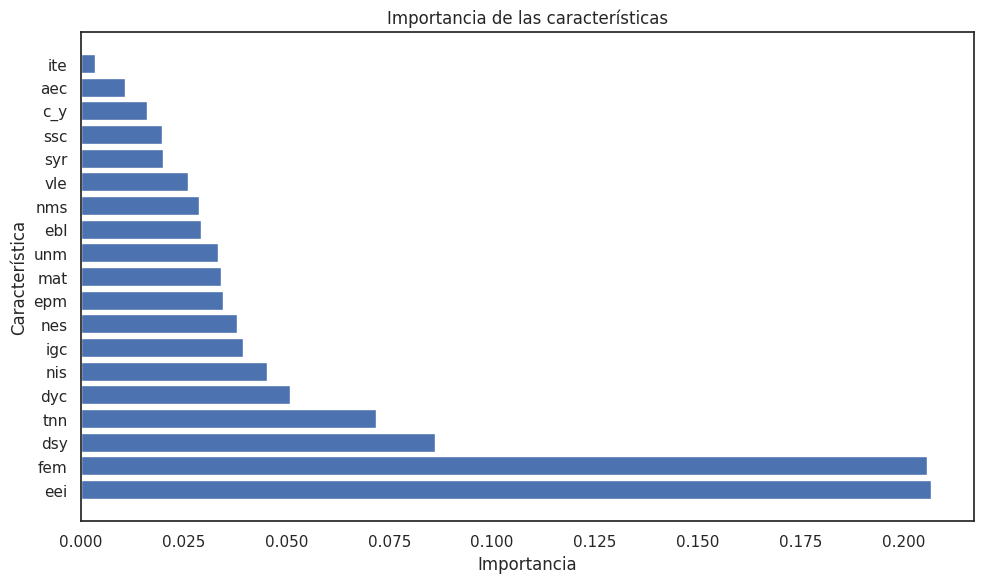

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(features_importance_df['Feature'], features_importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características')
plt.tight_layout()
plt.savefig('importancia_caracteristicas.svg', format='svg', bbox_inches='tight')
plt.show()

In [ ]:
import cairosvg

# Convert SVG to PDF with adjustable DPI
svg_file = 'importancia_caracteristicas.svg'
pdf_file = 'importancia_caracteristicas.pdf'
dpi = 300  # Adjust DPI as needed

# Convert SVG to PDF with specified DPI
cairosvg.svg2pdf(url=svg_file, write_to=pdf_file, dpi=dpi)

print(f"Archivo PDF '{pdf_file}' creado con éxito.")

Archivo PDF 'importancia_caracteristicas.pdf' creado con éxito.
